In [1]:
# Imports
import numpy as np
import random
import seaborn as sns
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir a semente aleatória para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Carregando os Dados

In [3]:
# Carregar o dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

## Análise de Clusterização

In [4]:
# Imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
# Selecionar as variáveis para análise de clusterização
variables = ['emissoesCO2e', 'populacao', 'qtdContratos', 'totalFinanciado', 'areaFinanciada']
data_cluster = data[variables]

In [6]:
# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

In [7]:
# Determinar o número ideal de clusters usando o método do cotovelo
inertia = []
for k in range(1, 11):  # Testar k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

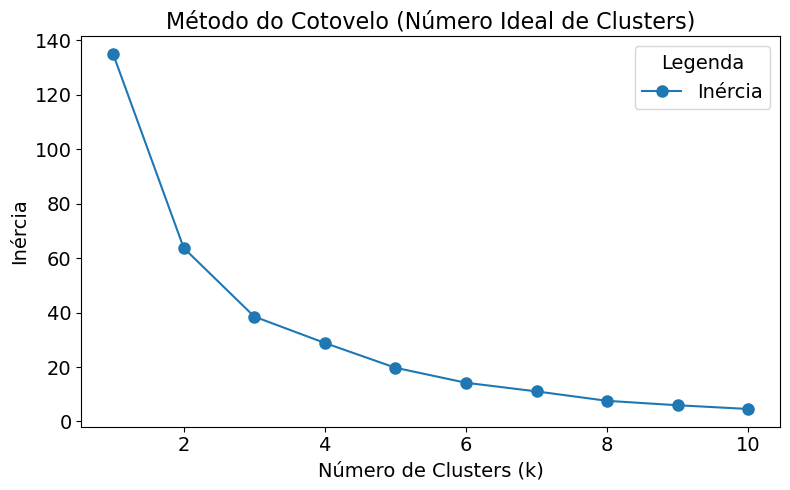

In [8]:
from matplotlib.ticker import ScalarFormatter

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 5))

# Plotar a curva do método do cotovelo
plt.plot(
    range(1, 11), 
    inertia, 
    marker='o', 
    markersize=8,  # Ajustar o tamanho dos marcadores 
    linestyle='-', 
    label='Inércia'
)

# Ajustar rótulos dos eixos
plt.xlabel('Número de Clusters (k)', fontsize=14)  # Ajustar o tamanho da fonte do eixo X
plt.ylabel('Inércia', fontsize=14)  # Ajustar o tamanho da fonte do eixo Y

# Ajustar título
plt.title('Método do Cotovelo (Número Ideal de Clusters)', fontsize=16)

# Ajustar os ticks dos eixos
plt.xticks(fontsize=14)  # Ajustar o tamanho dos rótulos do eixo X
plt.yticks(fontsize=14)  # Ajustar o tamanho dos rótulos do eixo Y

# Ajustar as ordens de grandeza no eixo Y (se aplicável)
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_offset_text().set_fontsize(14)

# Adicionar legenda (opcional, caso relevante)
plt.legend(
    fontsize=14,  # Ajustar o tamanho da fonte da legenda
    title='Legenda', 
    title_fontsize=14, 
    markerscale=1  # Escala dos marcadores na legenda
)

plt.tight_layout()
plt.show()

In [9]:
# Aplicar K-Means com o número de clusters ideal (escolhido manualmente após o gráfico)
n_clusters = 3  # Ajuste conforme o gráfico do cotovelo
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [10]:
# Criar mapeamento dos clusters numéricos para letras
cluster_labels = {0: 'B', 1: 'C', 2: 'A'}

# Criar uma nova coluna com os rótulos nomeados
data['Cluster_Label'] = data['Cluster'].map(cluster_labels)

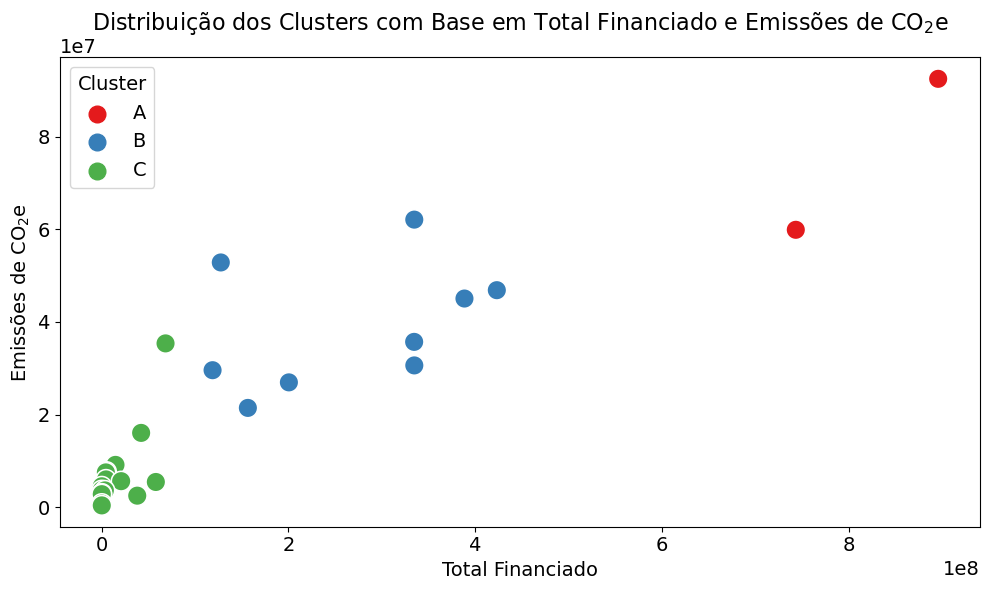

In [11]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='totalFinanciado',
    y='emissoesCO2e',
    hue='Cluster_Label',  # agora usando os nomes A, B, C
    data=data,
    palette='Set1',
    s=200
)

# Eixo X e Y
plt.xlabel('Total Financiado', fontsize=14)
plt.ylabel('Emissões de CO$_2$e', fontsize=14)

# Título
plt.title('Distribuição dos Clusters com Base em Total Financiado e Emissões de CO$_2$e', fontsize=16)

# Legenda
plt.legend(
    title='Cluster',
    fontsize=14,
    title_fontsize=14,
    scatterpoints=1,
    markerscale=2
)

# Ticks e formatação
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.get_offset_text().set_fontsize(14)
ax.yaxis.get_offset_text().set_fontsize(14)

plt.tight_layout()
plt.show()

In [12]:
# Visualizar a média das variáveis em cada cluster
cluster_summary = data.groupby('Cluster_Label')[variables].mean()

# Convertendo as colunas população e contratos para números inteiros
cluster_summary['populacao'] = cluster_summary['populacao'].astype(int)
cluster_summary['qtdContratos'] = cluster_summary['qtdContratos'].astype(int)

# Formatando as demais colunas para uma casa decimal
cluster_summary['emissoesCO2e'] = cluster_summary['emissoesCO2e'].round(1)
cluster_summary['totalFinanciado'] = cluster_summary['totalFinanciado'].round(1)
cluster_summary['areaFinanciada'] = cluster_summary['areaFinanciada'].round(1)

#Resultado
print("Média das variáveis por Cluster:")
cluster_summary

Média das variáveis por Cluster:


,emissoesCO2e,populacao,qtdContratos,totalFinanciado,areaFinanciada
Cluster_Label,,,,,
A,76170174.9,1460107,510,819632629.5,177657.3
B,39012868.1,1376636,189,268749656.7,53074.8
C,7146542.3,641399,18,16188105.5,2720.7


# Fim